In [1]:
import argparse
import os
import sys
import numpy as np

import torch
import matplotlib.pyplot as plt   

sys.path.append('/user_data/mmhender/featsynth/code/')
sys.path.insert(0, '/user_data/mmhender/featsynth/code/')

from utils import things_utils

import PIL

/home/mmhender/imstat_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
basic_names = list(info['binfo'].keys())

# list of all files in each category
fn = os.path.join(ecoset_info_path, 'ecoset_file_info.npy')
efiles = np.load(fn, allow_pickle=True).item()


In [3]:
# layers = ['relu1_1', 'pool1','pool2','pool3','pool4']    
layers = ['pool1','pool2','pool3','pool4']    
n_layers = len(layers)

In [4]:
stim_path = '/user_data/mmhender/stimuli/featsynth/images_v2/'

In [7]:
# choose images to analyze here
pix_thresh = 256

In [8]:
n_ims_do = 2;

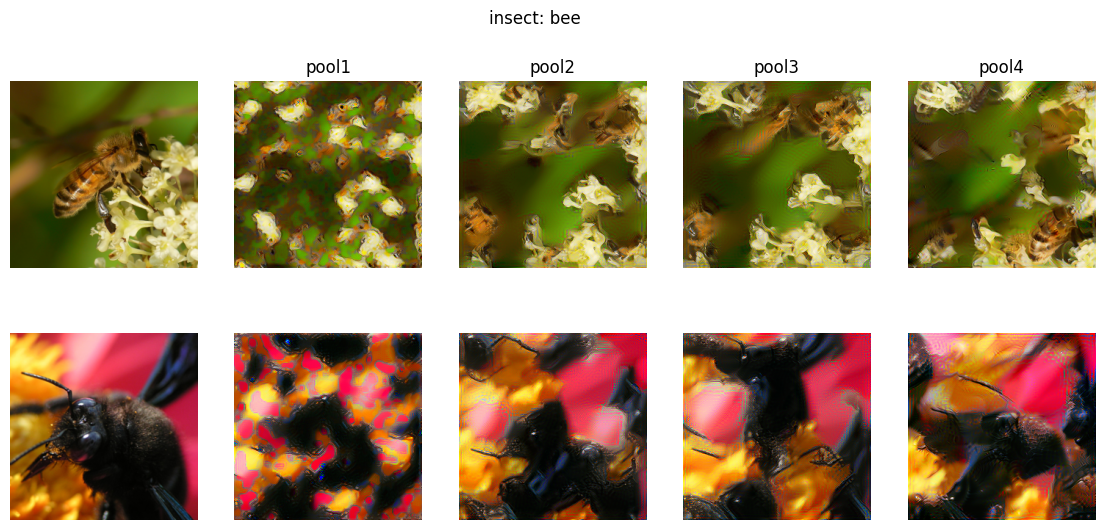

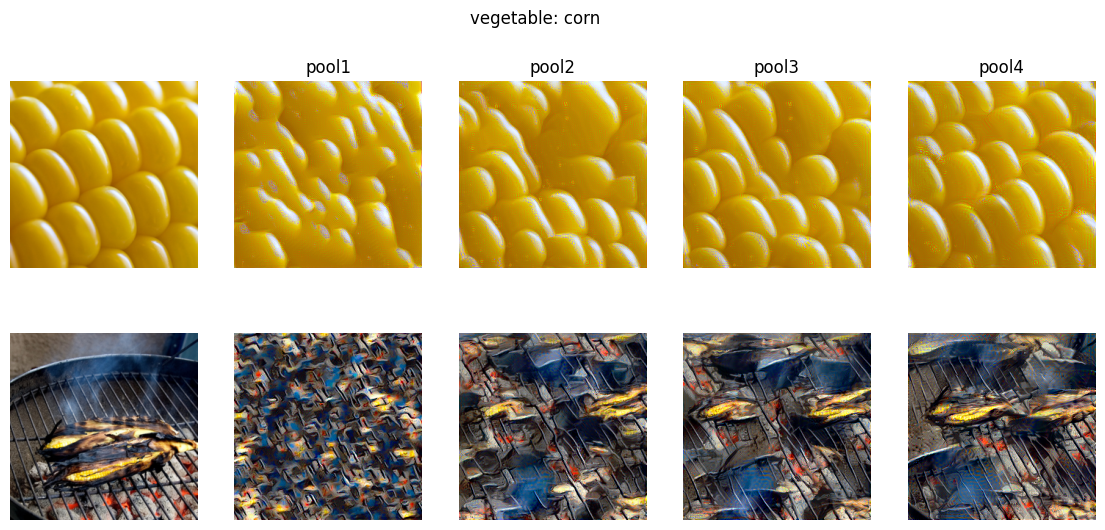

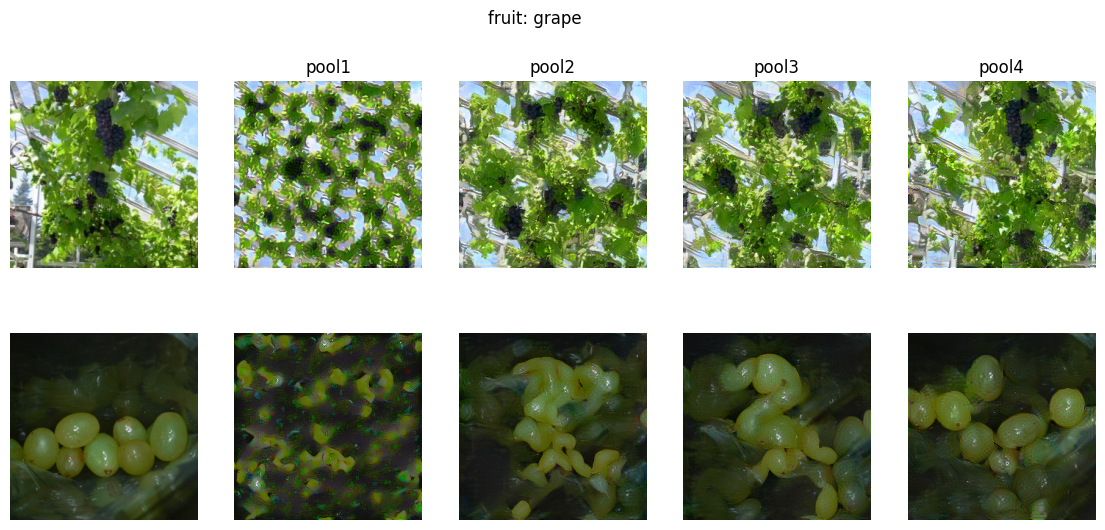

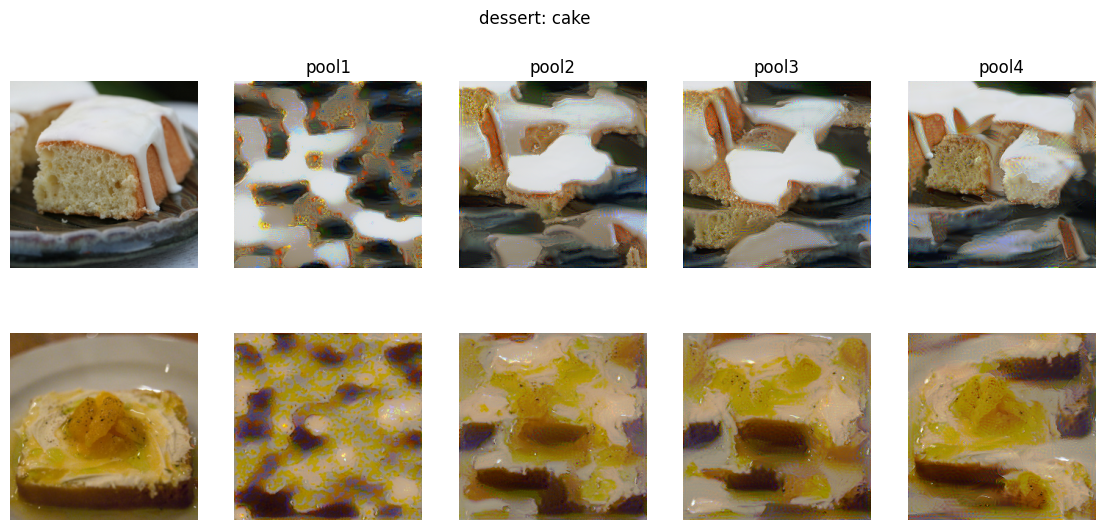

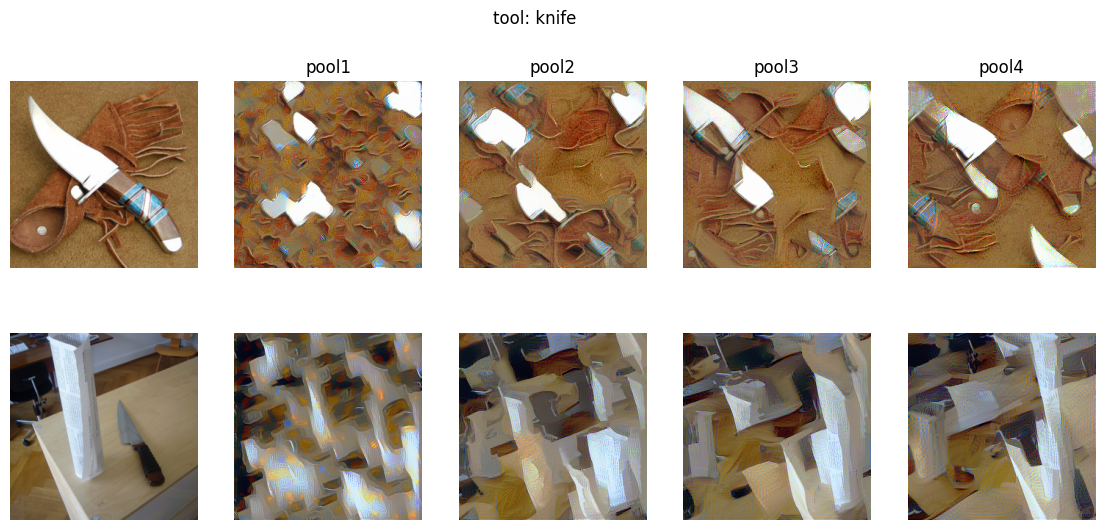

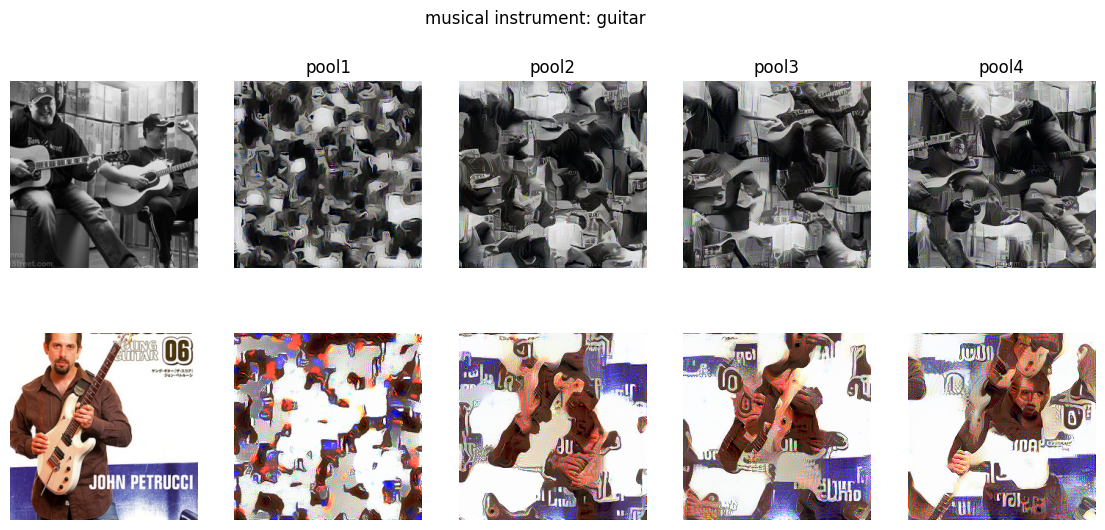

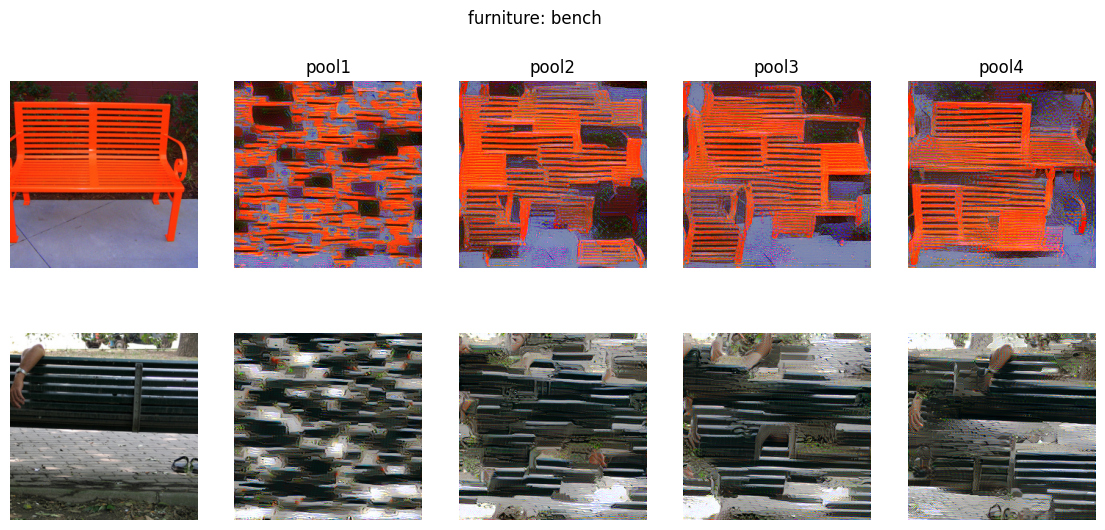

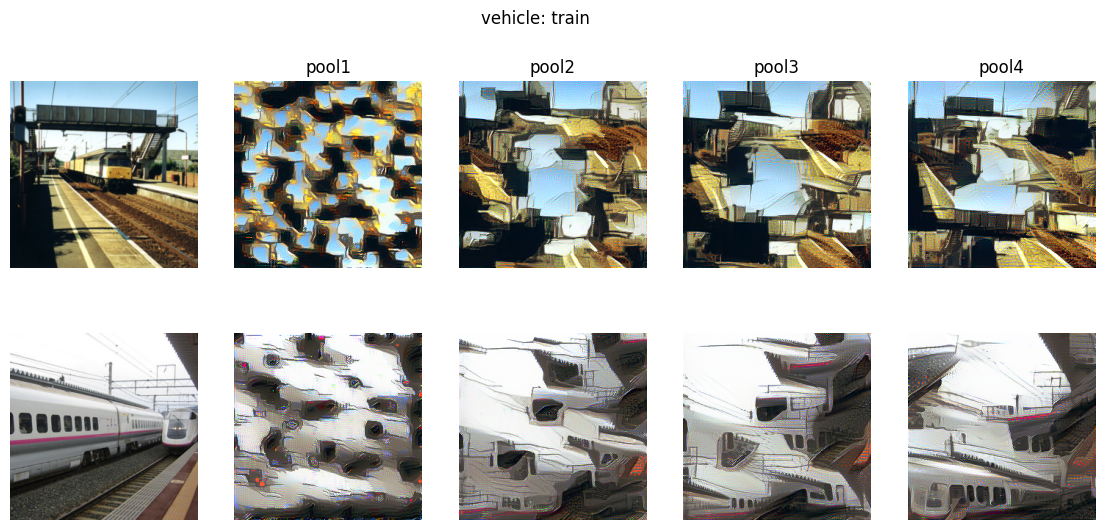

In [18]:
for bi in np.arange(1,64,8):

    bname = basic_names[bi]
    sname = info['binfo'][bname]['super_name']
    
    imfiles_all = efiles[bname]['train']['images']
    sizes = efiles[bname]['train']['size']
    abv_thresh = np.array([(s1>=pix_thresh) & (s2>=pix_thresh) for s1, s2 in sizes])
    is_rgb = np.array(efiles[bname]['train']['mode'])=='RGB'
    ims_use_all = np.where(abv_thresh & is_rgb)[0]

    np.random.seed(353455+bi)
    ims_use = np.random.choice(ims_use_all, n_ims_do, replace=False)

    plt.figure(figsize=(14,6))
    pi=0;

    for ii, im in enumerate(ims_use):

        name = '%s_%s'%(bname, imfiles_all[im].split('.')[0])
        
        out_dir = os.path.join(stim_path, name)
        target_image_filename = os.path.join(out_dir, 'orig.png')

        im = PIL.Image.open(target_image_filename)

        pi+=1
        plt.subplot(n_ims_do, len(layers)+1, pi)
        plt.imshow(im)
        plt.axis('off')
        # if ii==0:
        #     plt.title('orig')

        for ll in range(n_layers):

            scrambled_image_filename = os.path.join(out_dir, \
                                                'scramble_upto_%s.png'%(layers[ll]))
            im = PIL.Image.open(scrambled_image_filename)

            pi+=1
            plt.subplot(n_ims_do, len(layers)+1, pi)
            plt.imshow(im)
            plt.axis('off')
            if ii==0:
                plt.title(layers[ll])

    plt.suptitle('%s: %s'%(sname, bname))